In [1]:
#Here, we will do some sentiment analysis of CNN contributors using Google API for sentiment analysis
import numpy as np
import pandas as pd
import urllib
import bs4
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


  Using cached https://files.pythonhosted.org/packages/8e/4e/9e01986bb40886bb71b572115cead5f445f7221a285a407d2274be21fc27/wordcloud-1.5.0-cp27-cp27mu-manylinux1_x86_64.whl


In [2]:
links=[]

page="https://www.cnn.com/profiles"
f=urllib.urlopen(page)
myfile=f.read()
soup=bs4.BeautifulSoup(myfile)
#print soup
articles_parent=soup.find_all('h3', {"class":'cd__headline'})
for i in articles_parent:
    for j in soup.find_all('a', href=True):
        if "profiles" in j['href']:
            link="https://www.cnn.com"+j["href"]
            if link not in links:
                links.append(link)
                

In [4]:
#Note, if you are running this on a local machine, it will take a very long time. It takes a few minutes to run on my
#Google clould VM instance.  The program is essentially going to each link in the list above, then finding the headlines 
#from that contributor, and appending the text of the headline to a new list, called quotes.

quotes=[]

for i in links:
  polarity_scores=[]
  f=urllib.urlopen(i)
  myfile=f.read()
  soup=bs4.BeautifulSoup(myfile)
  articles_parent=soup.find_all('span', {"class":'cd__headline-text'})
  for j in articles_parent:
    quote=j.get_text()
    quotes.append(quote)


In [6]:
quotes=quotes[387:len(quotes)]
quotes[1:10]

[u'Trump names Mulvaney acting chief of staff',
 u'Trump seething after Cohen sentencing',
 u"Trump concerned about being impeached, sees it as a 'real possibility,' source says",
 u'Source: Trump concerned impeachment possible',
 u"Source: Trump 'super pissed' by Ayers process",
 u'Trump on filing: Totally clears the President',
 u'Trump eyes ex-Bush 41 attorney general to succeed Sessions',
 u'Mattis: Putin tried again to meddle in elections',
 u'CIA director Haspel caught in Khashoggi briefing tug-of-war']

In [8]:
len(quotes)

9369

In [9]:
#Use list comprehension and split each headline on a space to end up with a list of words.
words=[w for line in quotes for w in line.split()]
len(words)

82000

In [10]:
#Only keep words of a certain length...it is up to you what length.
words_new=[word for word in words if len(word) >=6]

In [11]:
len(words_new)

34789

In [12]:
#Create a dictionary with the word and associated frequencies of each word.
counters={}
for i in words_new:
  if i in counters:
    counters[i]+=1
  else:
    counters[i]=1



/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


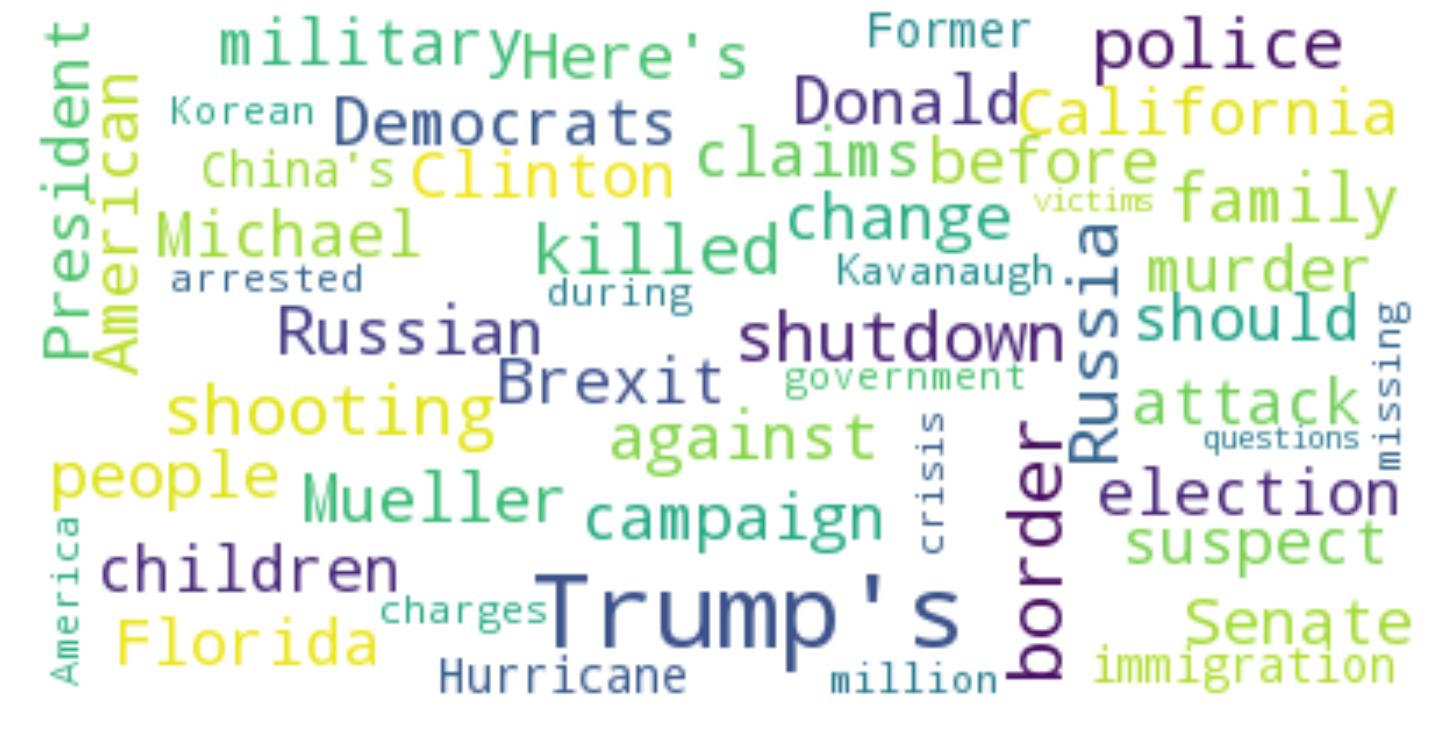

In [13]:
#Generate the word cloud from the dictionary created above.

wordcloud = WordCloud(max_words=50, background_color="white", max_font_size=30).generate_from_frequencies(counters)

# Display the generated image:
plt.figure(figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()